## [教學目標]
學習 sklearn 中，各種評估指標的使用與意義


https://medium.com/@jacky308082/machine-learning-%E4%B8%8B%E7%9A%84-linear-regression-%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-7e1dd03a4d46
    
https://zhuanlan.zhihu.com/p/36305931    

## [範例重點]
注意觀察各指標的數值範圍，以及輸入函數中的資料格式

In [1]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

## 回歸問題
常見的評估指標有
- MAE
- MSE
- R-square

我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [2]:
#sklearn.datasets.make_regression
#   Generate a random regression problem.

#(1) n_features : int, optional (default=100) ,The number of features.
#    n_features=1，只有一種特徵(features)

#(2) random_state : int, RandomState instance or None (default)
#    random_state 相当于随机数种子random.seed() 。random_state 与 random seed 作用是相同的。


#(3) noise : float, optional (default=0.0)，
#            The standard deviation of the gaussian noise applied to the output.
#    noise 分散程度

X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料

In [3]:
from scipy import stats

stats.describe(X)

DescribeResult(nobs=100, minmax=(array([-2.6197451]), array([1.85227818])), mean=array([-0.10384652]), variance=array([0.82476989]), skewness=array([-0.17526772]), kurtosis=array([-0.15540471]))

In [4]:
stats.describe(y)

DescribeResult(nobs=100, minmax=(-112.82160754913777, 77.62370930498577), mean=-3.9806127503457667, variance=1524.840320658906, skewness=-0.16442643330397616, kurtosis=-0.1529900516145557)

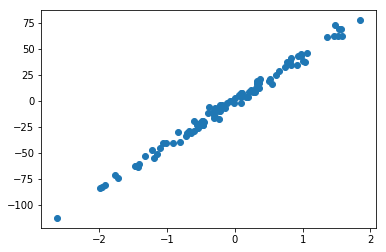

In [5]:
plt.scatter(X,y)

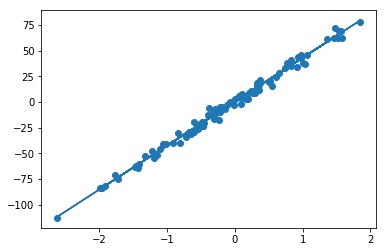

In [6]:
model = LinearRegression() # 建立回歸模型

#Fit linear model.
model.fit(X, y) # 將資料放進模型訓練

#Predict using the linear model
prediction = model.predict(X) # 進行預測


plt.scatter(X,y)
plt.plot(X,prediction)

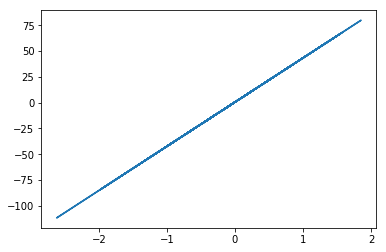

In [7]:
plt.plot(X,prediction)

In [8]:
prediction

array([  40.34302144,    4.19336052,  -44.82463681,   13.92196864,
        -20.05196866,   28.19976374,  -19.37728083,   23.69821121,
         26.65773622,   43.43685133,   35.65952358,   66.32404624,
         32.08683666,   -8.94020046,  -34.15326849,    4.39519929,
        -83.44610398,   22.44391545,   44.61295924, -111.7102032 ,
         21.7351118 ,    4.62286099,  -19.47628218,   39.66313291,
         67.46334925,   63.2244349 ,  -25.25301918,   -1.06800796,
        -25.29874711,  -50.75495713,   15.75743795,   16.55325801,
         11.64430971,  -22.21803585,  -38.41511637,    8.89555137,
        -12.33730754,   15.9511301 ,   35.68703118,  -12.02414261,
         15.94083544,  -28.51943454,   65.68146599,  -21.72604009,
         -9.5602909 ,  -16.32383999,  -12.42707205,  -27.15767739,
         14.54301353,    9.40948672,  -13.56429239,    0.68500193,
         -9.5595879 ,   63.74877183,  -16.02299543,   15.17961916,
         14.65058997,   -7.48378366,   -9.57886424,  -84.64071

In [9]:
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y)  # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y)             # 使用 r-square 評估

print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  2.841797252565566
MSE:  12.48868006739824
R-square:  0.9916581036260311


## 分類問題
常見的評估指標有
- AUC
- F1-Score (Precision, Recall)

In [10]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [11]:
print(y_test) # 測試集中的 label

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [12]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值

In [13]:
print(y_pred)

[0.05071736 0.242871   0.77314401 0.94219913 0.82285351 0.96897887
 0.54116433 0.88239267 0.81064257 0.16547978 0.76521774 0.0681749
 0.51926906 0.52722183 0.18171296 0.92794219 0.49522616 0.61202655
 0.48901205 0.79267964 0.71921899 0.13524899 0.97212145 0.09798628
 0.20982759 0.1820066  0.31552986 0.91692072 0.77787463 0.80468087
 0.90392886 0.77061232 0.52567833 0.83567755 0.82511877 0.22693609
 0.92443158 0.30283708 0.6938658  0.59634156 0.76912137 0.55269033
 0.57192989 0.16180589 0.97460127 0.27703645 0.46306349 0.42665952
 0.83578048 0.69150745]


### AUC

In [14]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.5398981324278438


## F1-Score

In [15]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.634920634920635
Precision:  0.625
Recall:  0.6451612903225806


## [作業重點]
了解 F1-score 的公式意義，並試著理解程式碼

## 作業
請參考 F1-score 的公式與[原始碼](https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/metrics/classification.py#L620)，試著寫出 F2-Score 的計算函數